In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.utils import image_dataset_from_directory

In [55]:
train_ds = image_dataset_from_directory(
    "../data/human-and-non-human/training_set/training_set",
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(250,250),
    batch_size=32,
    labels="inferred",
)
train_ds

Found 8017 files belonging to 2 classes.
Using 5612 files for training.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [54]:
val_ds = image_dataset_from_directory(
 "../data/human-and-non-human/training_set/training_set",
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(250,250),
  batch_size=32,
  labels="inferred",
)
val_ds

Found 8017 files belonging to 2 classes.
Using 2405 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
from keras import Sequential
from keras import layers
from keras.layers import Rescaling

In [56]:

from keras import layers, models

# Load pretrained MobileNetV2
base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(250, 250, 3))

# Freeze the base model (not trainable)
base_model.trainable = False

# Add custom layers on top for your specific task
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification: human (1) vs not human (0)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now, you can fine-tune it or train on your human vs not-human dataset
model.fit(train_ds, epochs=5, validation_data=val_ds)


C:\Users\HP\AppData\Local\Temp\ipykernel_13808\540324685.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(250, 250, 3))


Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 134s 741ms/step - accuracy: 0.8858 - loss: 0.2568 - val_accuracy: 0.9609 - val_loss: 0.1045
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 137s 782ms/step - accuracy: 0.9701 - loss: 0.0805 - val_accuracy: 0.9696 - val_loss: 0.0745
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 146s 830ms/step - accuracy: 0.9844 - loss: 0.0482 - val_accuracy: 0.9613 - val_loss: 0.0927
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 119s 676ms/step - accuracy: 0.9880 - loss: 0.0369 - val_accuracy: 0.9742 - val_loss: 0.0671
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 78s 441ms/step - accuracy: 0.9916 - loss: 0.0291 - val_accuracy: 0.9825 - val_loss: 0.0495


In [59]:

test_training_ds = image_dataset_from_directory(
  "../data/human-and-non-human/test_set/test_set",
  seed=123,
  image_size=(250,250),
  batch_size=32,
  labels="inferred",

)
test_training_ds

Found 2723 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
model.evaluate(test_training_ds)

86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step - accuracy: 0.9737 - loss: 0.0705


[0.06365882605314255, 0.977230966091156]

In [61]:
train_ds.class_names

['humans', 'non-humans']

In [71]:
import cv2 as cv
import numpy as np

# Load grayscale image
image = cv.imread("../data/human-and-non-human/sarbesh.jpg")

# Resize and normalize
resized_image = cv.resize(image, (250, 250))
resized_image = np.array(resized_image)

resized_image = np.expand_dims(resized_image , axis=0)

# Now this will work
prediction = model.predict(resized_image)
if prediction>0.5:
    print("human")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
human


In [68]:
model.predict(resized_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.97927094]], dtype=float32)

In [73]:
import joblib
joblib.dump(model,"human_recog_model.joblib")

['human_recog_model.joblib']

In [178]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

def build_and_train_shortage_model():

    hospital_names = [
        "Amri Hospital", "City Hospital", "Medilane Hospital",
        "Care Hospital", "Sunrise Hospital", "LifeCare Hospital",
        "Apollo Hospital", "Healing Touch Clinic", "Global Health Centre",
        "Green Cross Hospital"
    ]

    blood_groups = ["A+", "A-", "B+", "B-", "O+", "O-", "AB+", "AB-"]
    urgency_levels = ["Regular Need", "URGENT"]

    data = []
    for _ in range(200):
        hospital = random.choice(hospital_names)
        blood_group = random.choice(blood_groups)
        urgency = random.choice(urgency_levels)
        units_needed = random.randint(1, 10)
        data.append([hospital, blood_group, urgency, units_needed])

    df = pd.DataFrame(data, columns=["Hospital Name", "Blood Group", "Urgency", "Units Needed"])

 
    df["Hospital Name Encoded"] = df["Hospital Name"].astype('category').cat.codes
    df["Blood Group Encoded"] = df["Blood Group"].astype('category').cat.codes
    df["Urgency Encoded"] = df["Urgency"].map({"Regular Need": 0, "URGENT": 1})

    df['Shortage'] = df.apply(
        lambda row: 1 if (row['Urgency'] == "URGENT" and row['Units Needed'] > 5) else 0,
        axis=1
    )


    X = np.array(df[['Urgency Encoded', 'Units Needed']])
    y = np.array(df['Shortage'])

 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    shortage_predict_model = RandomForestClassifier()
    shortage_predict_model.fit(X_train, y_train)

    print("Training Accuracy:", shortage_predict_model.score(X_train, y_train))
    print("Testing Accuracy:", shortage_predict_model.score(X_test, y_test))

 
    def predict_shortage(urgency_encoded, units_needed):
        input_data = np.array([[urgency_encoded, units_needed]])
        prediction = shortage_predict_model.predict(input_data)
        return "Shortage" if prediction[0] == 1 else "No Shortage"
    
    return predict_shortage


predict_fn = build_and_train_shortage_model()


print(predict_fn(1, 8))  # urgent = 1
print(predict_fn(0, 2)) # regular need = 0

Training Accuracy: 1.0
Testing Accuracy: 1.0
Shortage
No Shortage


In [31]:
import joblib
joblib.dump(shortage_predict_model , "shortage_predict_model.joblib")

['shortage_predict_model.joblib']

In [ ]:
import random
import pandas as pd

LAT_MIN, LAT_MAX = 20.2, 20.4  
LAT_VAR_MIN, LAT_VAR_MAX = 20.15, 20.55  

LON_MIN, LON_MAX = 85.7, 85.9  
LON_VAR_MIN, LON_VAR_MAX = 85.6, 86.05  


blood_types = ['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-']

def generate_donor():

    if random.random() < 0.3:  
        latitude = random.uniform(20.2, 20.25)
        longitude = random.uniform(85.7, 85.75)
    elif random.random() < 0.6: 
        latitude = random.uniform(20.25, 20.3)
        longitude = random.uniform(85.75, 85.8)
    else:  
        latitude = random.uniform(20.3, 20.4)
        longitude = random.uniform(85.8, 85.9)
    

    donor = {
        'age': random.randint(18, 60),
        'last_donation_hours': random.randint(0, 365*24),
        'latitude': latitude,
        'longitude': longitude,
        'blood_type': random.choice(blood_types),
    }

    if donor['last_donation_hours'] > (90 * 24) and 18 <= donor['age'] <= 55:
        label = 1  
    else:
        label = random.choices([0, 1], weights=[0.7, 0.3])[0]  
    donor['label'] = label
    
    return donor


data = [generate_donor() for _ in range(1000)]

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('bbsr_donor_dataset.csv', index=False)




Dataset created and saved as bbsr_donor_dataset.csv


In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


donor_dataset = pd.read_csv('../data/bbsr_donor_dataset.csv')
print(df.head())

label_encoders = {}
for col in ['blood_type']:
    le = LabelEncoder()
    donor_dataset[col] = le.fit_transform(donor_dataset[col])
    label_encoders[col] = le

X = donor_dataset.drop(columns=['label'])
y = donor_dataset['label']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


donation_prob_model = LogisticRegression()
donation_prob_model.fit(X_train, y_train)


y_pred = donation_prob_model.predict(X_test)
print(classification_report(y_test, y_pred))


probabilities = donation_prob_model.predict_proba(X_test)[:, 1]  


print("First 5 donation probabilities:", probabilities[:5])


   age  last_donation_hours   latitude  longitude blood_type  label  cluster
0   42                 5017  20.370107  85.887012         O-      1        0
1   19                 4436  20.270118  85.758739        AB+      1        1
2   54                 1629  20.296782  85.759372         O+      0        1
3   51                 6888  20.220313  85.734916         B+      1        2
4   48                 8052  20.261533  85.771666         B-      1        1
              precision    recall  f1-score   support

           0       0.68      0.46      0.55        50
           1       0.84      0.93      0.88       150

    accuracy                           0.81       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.80      0.81      0.80       200

First 5 donation probabilities: [0.78186568 0.34315878 0.9171839  0.7218175  0.69895806]


In [123]:
import joblib
joblib.dump(donation_prob_model , "donation_prob_model.joblib")

['donation_prob_model.joblib']

In [124]:
donor_dataset

,age,last_donation_hours,latitude,longitude,blood_type,label
0,42,5017,20.370107,85.887012,7,1
1,19,4436,20.270118,85.758739,2,1
2,54,1629,20.296782,85.759372,6,0
3,51,6888,20.220313,85.734916,4,1
4,48,8052,20.261533,85.771666,5,1
...,...,...,...,...,...,...
995,31,3338,20.274332,85.767069,0,1
996,25,6086,20.387638,85.842842,7,1
997,45,2737,20.237711,85.715039,7,1
998,19,5479,20.351355,85.862660,4,1


In [ ]:

blood_compatibility = {
    'O-': ['O-'],
    'O+': ['O-', 'O+'],
    'A-': ['O-', 'A-'],
    'A+': ['O-', 'O+', 'A-', 'A+'],
    'B-': ['O-', 'B-'],
    'B+': ['O-', 'O+', 'B-', 'B+'],
    'AB-': ['O-', 'A-', 'B-', 'AB-'],
    'AB+': ['O-', 'O+', 'A-', 'A+', 'B-', 'B+', 'AB-', 'AB+']
}

def find_best_donors(recipient_blood_type, top_k=5):

    encoded_blood = label_encoders['blood_type'].transform([recipient_blood_type])[0]
    

    compatible_bloods = blood_compatibility[recipient_blood_type]
    compatible_bloods_encoded = label_encoders['blood_type'].transform(compatible_bloods)

    compatible_donors = donor_dataset[donor_dataset['blood_type'].isin(compatible_bloods_encoded)].copy()

 
    X_compatible = compatible_donors.drop(columns=['label'])
    X_compatible_scaled = scaler.transform(X_compatible)

    donation_probs = donation_prob_model.predict_proba(X_compatible_scaled)[:, 1]
    compatible_donors['donation_probability'] = donation_probs

    best_donors = compatible_donors.sort_values(by='donation_probability', ascending=False)

    return best_donors.head(top_k)


In [ ]:
best_donors = find_best_donors('A+', top_k=5)  
print(best_donors)

     age  last_donation_hours   latitude  longitude  blood_type  label  \
834   18                 8223  20.375368  85.803764           6      1   
754   20                 8407  20.215421  85.706313           0      1   
868   18                 8417  20.355500  85.861231           1      1   
593   19                 8609  20.210018  85.742476           1      1   
635   20                 8297  20.297286  85.775667           6      1   

     donation_probability  
834              0.993801  
754              0.992810  
868              0.992400  
593              0.991500  
635              0.990710  


In [172]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

def find_best_donors(recipient_blood_type, user_latitude, user_longitude, top_k=5):
    encoded_blood = label_encoders['blood_type'].transform([recipient_blood_type])[0]
    

    compatible_bloods = blood_compatibility[recipient_blood_type]
    compatible_bloods_encoded = label_encoders['blood_type'].transform(compatible_bloods)

    compatible_donors = donor_dataset[donor_dataset['blood_type'].isin(compatible_bloods_encoded)].copy()

  
    X_compatible = compatible_donors.drop(columns=['label'])
    X_compatible_scaled = scaler.transform(X_compatible)

    donation_probs = donation_prob_model.predict_proba(X_compatible_scaled)[:, 1]
    compatible_donors['donation_probability'] = donation_probs


    compatible_donors['distance_km'] = haversine_distance(
        user_latitude,
        user_longitude,
        compatible_donors['latitude'].values,
        compatible_donors['longitude'].values
    )

    compatible_donors['score'] = (compatible_donors['donation_probability'] * 0.7) + (1 / (1 + compatible_donors['distance_km']) * 0.3)
    

    best_donors = compatible_donors.sort_values(by='score', ascending=False)

    return best_donors.head(top_k)


In [173]:
find_best_donors("A+" , 20.303675 , 85.817302 , 5)

,age,last_donation_hours,latitude,longitude,blood_type,label,donation_probability,distance_km,score
975,26,7647,20.310662,85.830705,1,1,0.980656,1.599091,0.801884
798,29,8506,20.315129,85.828615,7,1,0.980617,1.736088,0.796078
669,18,8202,20.294518,85.798368,6,1,0.989798,2.221657,0.785978
189,23,6938,20.319319,85.825266,7,1,0.973361,1.927558,0.783827
522,24,6542,20.307079,85.833367,7,1,0.961313,1.717532,0.783313


In [126]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler



donor_dataset = pd.read_csv('../data/bbsr_donor_dataset.csv')
print(df.head())

label_encoders = {}
for col in ['blood_type']:
    le = LabelEncoder()
    donor_dataset[col] = le.fit_transform(donor_dataset[col])
    label_encoders[col] = le

X = donor_dataset.drop(columns=['label'])
y = donor_dataset['label']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X

   age  last_donation_hours   latitude  longitude blood_type  label
0   42                 5017  20.370107  85.887012         O-      1
1   19                 4436  20.270118  85.758739        AB+      1
2   54                 1629  20.296782  85.759372         O+      0
3   51                 6888  20.220313  85.734916         B+      1
4   48                 8052  20.261533  85.771666         B-      1


,age,last_donation_hours,latitude,longitude,blood_type
0,42,5017,20.370107,85.887012,7
1,19,4436,20.270118,85.758739,2
2,54,1629,20.296782,85.759372,6
3,51,6888,20.220313,85.734916,4
4,48,8052,20.261533,85.771666,5
...,...,...,...,...,...
995,31,3338,20.274332,85.767069,0
996,25,6086,20.387638,85.842842,7
997,45,2737,20.237711,85.715039,7
998,19,5479,20.351355,85.862660,4


In [139]:
from sklearn.cluster import DBSCAN
anomaly_predictor_model = DBSCAN(eps=1.5)
anomaly_predictor_model.fit(X_scaled)


DBSCAN(eps=1.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_29208\456142174.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1],  cmap='viridis')


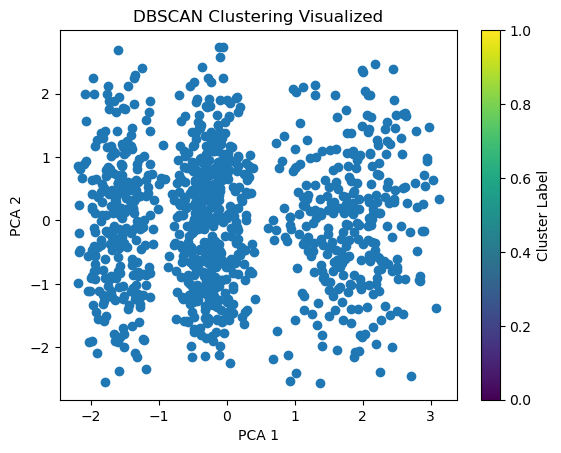

In [140]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1],  cmap='viridis')
plt.title('DBSCAN Clustering Visualized')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [141]:
import numpy as np
labels = dbscan.labels_
noise_index = np.where(labels==-1)[0]
for i in noise_index:
    print("anomaly behaviour: " , donor_dataset.iloc[i])
    
noise_index


array([], dtype=int64)

In [142]:
import joblib
joblib.dump(anomaly_predictor_model,"anomaly_predictor_model.joblib")

['anomaly_predictor_model.joblib']

c:\Users\HP\anaconda3\envs\tfenv\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_29208\127146151.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(donor_dataset['latitude'], donor_dataset['longitude'], cmap='viridis', s=50, alpha=0.6)


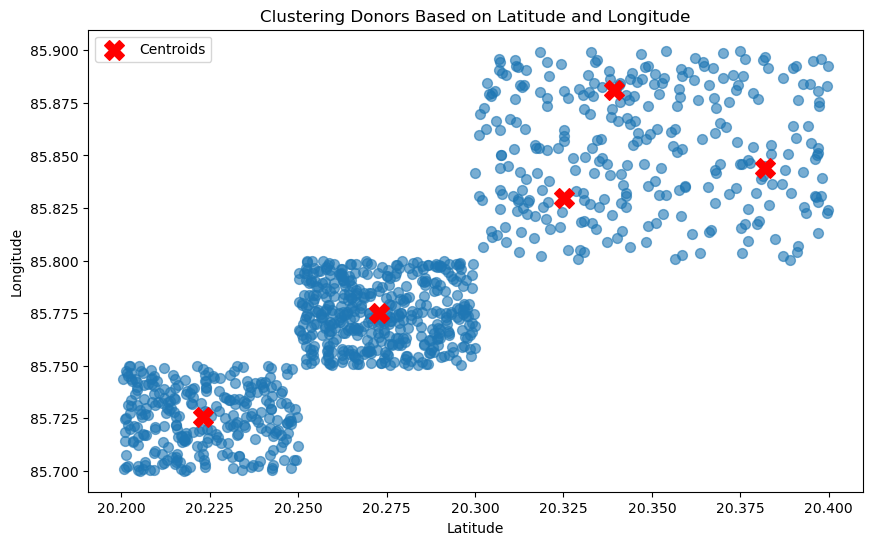

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans




X = donor_dataset[['latitude', 'longitude']]

kmeans = KMeans(n_clusters=5, random_state=42)  
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))


plt.scatter(donor_dataset['latitude'], donor_dataset['longitude'], cmap='viridis', s=50, alpha=0.6)


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, c='red', label='Centroids')

plt.title('Clustering Donors Based on Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()


In [162]:
donor_count = df["cluster"].value_counts()
best_cluster = donor_count.idxmax()
best_location = centers[best_cluster]
print(f"The best location for a blood donation camp would be : {best_location[0:]}")

The best location for a blood donation camp would be : [20.27285032 85.77492356]
